## Problem Definition and Scope

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Data Wraggling
## Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline
%pylab inline

In [2]:
os.chdir('C:\\Users\\user\\Documents\\Python\\Personal Learning\\Side Projects\\Titanic')
train_df = pd.read_csv('train.csv')

## Data Exploration


<img src="files/Legends.JPG">

In [3]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- There are a total of 891 rows and 12 columns of data. We can see that "Age", "Cabin" and "Embarked" seems to be missing for some rows. 

- What would determine the survival of a passenger on board the Titanic can be based on some factors. Preliminary, we can look more into sex, Pclass, and maybe cabin (cabin location?)

- Those dtype='object' would need to be dealt with as they are categories. 

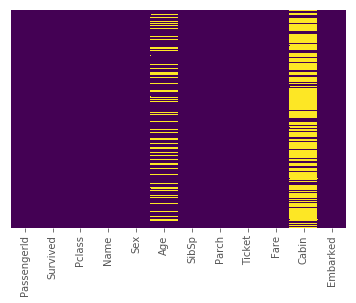

In [4]:
sns.heatmap(train_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

- With this heatmap, it is much more evident on the degree of values missing for 'Age' and 'Cabin"
- Even with the Legend, there is not much information on the letter and numerical values and its significance (Cabin). We can hesistate a guess that each cabin letter refers to an area on the ship.

In [5]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [6]:
train_df.Name.nunique()

891

- All the name entries are unique.
- It appears that married woman's maiden name are in parentheses.
- It may not be immediately useful as it has too many unique values as a categorical variable 
- The Last name might hold some insights when we try to group the family members together

In [7]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [8]:
train_df["Ticket"].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

- Upon taking another look at Ticket, we find that there were only 681 out of 891 entries that were unique (Duplicates).
- There tickets does not seem to follow any recognisable patterns that we can transform them into as useful data. 
- This column will be removed

In [9]:
train_df['Embarked'].isnull().sum()

2

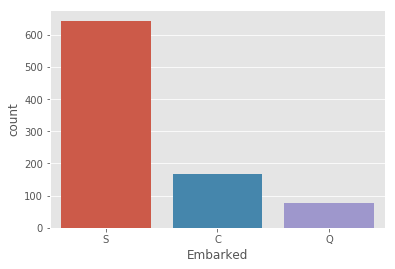

In [10]:
sns.countplot(x='Embarked',data=train_df)

- As seen from above, there are 3 embarkation points.
- An overwhelming number(644) of passengers boarded at location 'S'
- There are 2 missing values. We can fill the missing values with the mode safely
- We can treat 'Embarked' as 'sex' and encode it into dummy variables

In [11]:
train_df[train_df['Sex']=='male'].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

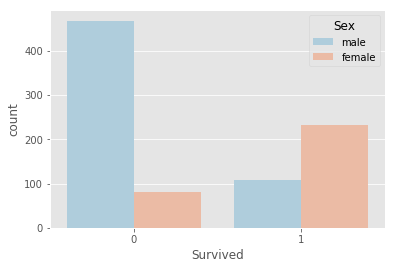

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train_df,palette="RdBu_r")

- There are more males (577) than females (314) onboard
- More people did not survive based on this count plot
- people that did not survive much more likely to be male

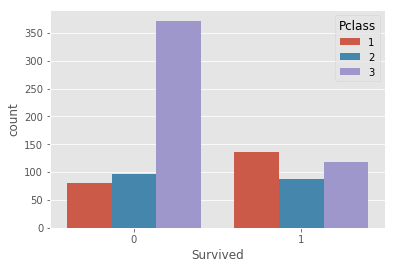

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

- People who did not survive were overwhemingly from the 3rd class
- Need to further analyse by percentage of total people per passenger class

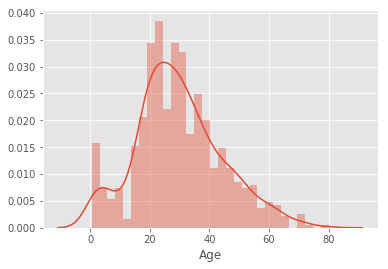

In [14]:
sns.distplot(train_df['Age'].dropna(),kde=True,bins=30)

- Almost Bimodal distribution
- from 0-10, 20-30 had the largest representation

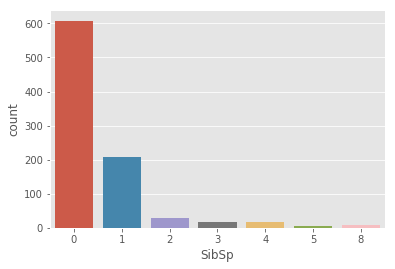

In [15]:
sns.countplot(x='SibSp',data=train_df)

- Most of the passengers have no siblings or 1 siblings

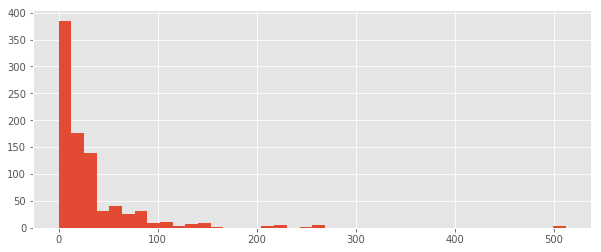

In [16]:
train_df['Fare'].hist(bins=40,figsize=(10,4))

- Most of the fares are of the lower end
- Makes sense as most of the passengers are of the 3rd class

In [17]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning and Preparation



- As seen from above, there are 3 columns 'Age','Embarked' and 'Cabin' with missing information.
- We will fill in Age and Embarked as they have few rows of missing data.

- However for Cabin more than half of it is missing, it may not be advisable to fill it in with the median. 
- There is a chance that missing variables/information can indicate that those passengers in those cabins did not survive to tell the tale.
- We can look into grouping the cabin data into alphabetical group.

### Age

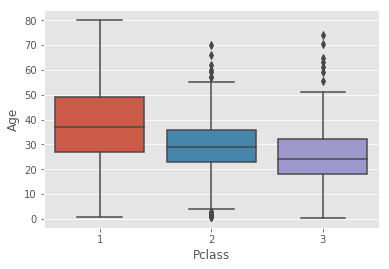

In [18]:
sns.boxplot(x='Pclass',y='Age', data=train_df)

- There are ways to inpute the missing ages information. The most direct method would be to use central values like mean or median. 
- There might be more sophisticated predictive methods that can model the age distribution better, but for practise purposes at this stage, we will stick with median.
- We decided to analyse the age information to see if there are any contextual information that we can draw out.
- From the boxplot above, it can be seen that higher passenger class tend to have higher age and as such this should be taken into account when imputation of missing data (age)
- In this case replacing with 0s is not a good option as it cannot be zero and dropping the column would result in lost of valuable information

In [19]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 24
        else:
            return 24
    else:
        return Age

In [20]:
train_df['Age']=train_df[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
train_df['Age'].count()

891

- Using the number of sibings, spouses, parents and children, we can derive the number of family members on board. Perhaps passengers with more family members are less likely to survive as they would spend more time trying to find and gather their family members.

### SibSp and Parch

In [22]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Cabin

In [23]:
train_df['Cabin'].head(25)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     D56
22     NaN
23      A6
24     NaN
Name: Cabin, dtype: object

- As seen from analysis above, there are many NaN values
- Valid cabin information would consist of an alphabet and a number behind.
- There is not much useful information available upfront. Propose to group them according to the alphabet groupings

In [24]:
cabinletters=train_df['Cabin'].astype(str)
new_Cabin=np.array([cabin[0] for cabin in cabinletters])
new_Cabin = pd.Categorical(new_Cabin)

In [25]:
pd.crosstab(train_df['Survived'],new_Cabin)

col_0,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


- Excluding the 'n' category which corresponds to the NaN values, its interesting to see that there are more survivals from Cabin with alphabets B,C,D,E,F. 
- However, this is not definitive as the missing information is too much. 
- It could also be that the people from these cabins did not survive( and they happen to fall into the NaN category)
- For this project, we will drop this cabin information

In [26]:
train_df.drop('Cabin',axis=1, inplace=True)

### PassengerId

In [27]:
train_df.drop('PassengerId',axis=1,inplace=True)

- PassengerId is just arbituary number assigned to each passenger.

### Tickets

In [28]:
train_df.drop('Ticket',axis=1,inplace=True)

### Embarked

In [29]:
train_df['Embarked'].fillna(value = train_df['Embarked'].mode()[0], inplace = True) 
train_df['Embarked'].count()

891

In [30]:
embarked= pd.get_dummies(train_df['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
train_df.drop('Embarked',axis=1,inplace=True)

### Sex

In [32]:
sex= pd.get_dummies(train_df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
train_df.drop('Sex',axis=1,inplace=True)

In [34]:
train_df2 = pd.concat([train_df,sex,embarked],axis=1)

In [35]:
train_df2.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'male', 'Q', 'S'],
      dtype='object')

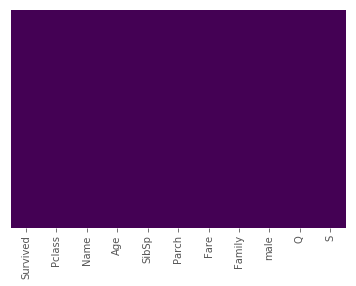

In [36]:
sns.heatmap(train_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Summary of what was done in the cleaning and transformation of data.
    - Missing 'Age' values were imputed according to the PClass
    - 'PassengeId','Ticket','Cabin','Embarked' information were dropped
    - 'Family'was constructed from 'SibSp' and 'Parch'
    - 'Embarked' was imputed with mode of the embarkation locations.
    - one hot encoding for 'sex','embarked'

## Logistic Regression Modelling
Let's just run the first logistic regression model on the numeric variables just to how things are going. Categorical variables require some encoding before they can be modeled.

\begin{equation}
\sigma(t) = \frac{1}{1 + e^{(-t)}} \\
t = \beta_0 + \beta_1x_1 + ... + \beta_nx_n
\end{equation}

## Variable selection

In [37]:
X = train_df2[['Pclass', 'Age', 'Family','male', 'Q', 'S']]
y = train_df2['Survived']

- X are the features 
- y is results of the prediction of survival

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- Splitting the data into training set for the model and testing set once model is trained
- Test set is allocated 30%.
- Random state to ensure specific sets of random splits in data is set at 101

In [40]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
print(logmodel.intercept_)
print(logmodel.coef_)

[ 3.92357829]
[[-0.90064441 -0.02246797 -0.12218459 -2.44157239 -0.00558684 -0.3360127 ]]


In [42]:
predictions = logmodel.predict(X_test)

- call some sample prediction based on test dataset. evaluate the model

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.90      0.83       154
          1       0.83      0.62      0.71       114

avg / total       0.79      0.78      0.78       268



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[139,  15],
       [ 43,  71]], dtype=int64)

- There were 210 accurate predictions of survival, 43 false positives,15 false negatives


- Bottom right corner indicates the True Positives (survived)
- Bottom left indicates the False positives (predicted survived but didnt)
- Top left indicates True negatives (did not survive)
- Top right indicates false negatives (predicted did not survive but survived)

## KFold Cross-Validation
This is done to obtain a good proxy to the accuracy score, with the KFold technique instead of the usual training and testing data splitting.

In [51]:
from sklearn.model_selection import KFold
v = KFold(n_splits=10)

fold_accuracy = []

for train, test in v.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    
    y_train = y.iloc[train]
    y_test = y.iloc[test]

    model = logmodel.fit(X_train,y_train)
    valid = model.score(X_test, y_test)
    
    fold_accuracy.append(valid)
    
print("Accuracy per fold: ", fold_accuracy, "\n")
print("Min accuracy: ", min(fold_accuracy))
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))
print("Max accuracy: ", max(fold_accuracy))

#lm.fit(X_train, X_test)

Accuracy per fold:  [0.78888888888888886, 0.8314606741573034, 0.7752808988764045, 0.8314606741573034, 0.797752808988764, 0.7865168539325843, 0.7865168539325843, 0.7640449438202247, 0.88764044943820219, 0.797752808988764] 

Min accuracy:  0.76404494382
Average accuracy:  0.804731585518
Max accuracy:  0.887640449438
